
## Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap as umap
# import umap.umap_ as umap

## Preprocessing data

In [13]:
# Read the CSV file
df = pd.read_csv("full_features.csv")

df = df.drop(df.columns[0], axis=1)

# Replace all NaN values with 0
df.fillna(0, inplace=True)

# Extract the numeric features
df = df.select_dtypes(include='number')

# Find columns with only zeros
zero_columns = df.columns[(df == 0).all()]

# Remove columns with only zeros from the data
data_filtered = df.drop(zero_columns, axis=1)

# Normalize or standardize the numeric features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_filtered)

In [14]:
data = pd.read_csv("full_features.csv")
# data = data.drop(data.columns[0], axis=1)
data.describe()

,"countMatBrush 0,0","countMatBrush 0,1","countMatBrush 0,2","countMatBrush 1,0","countMatBrush 1,1","countMatBrush 1,2","countMatBrush 2,0","countMatBrush 2,1","countMatBrush 2,2","AlreadyVisitedBrush 0,0",...,"AlreadyVisitedTwizzersLast 1,2","AlreadyVisitedTwizzersLast 2,0","AlreadyVisitedTwizzersLast 2,1","AlreadyVisitedTwizzersLast 2,2",%OfSandTwizzersLast,%OfPaperTwizzersLast,switchLast,frames_brush_per_video_last,frames_tw_per_video_last,avg_brush_length_last
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,38.000000
mean,16.136364,55.886364,12.886364,38.818182,165.136364,48.931818,4.954545,38.204545,17.772727,3.886364,...,2.545455,10.977273,6.795455,22.272727,37.130510,56.051308,161.000000,15.025756,78.156062,1.718338
std,67.347275,116.832262,42.296966,153.035681,347.558300,93.631737,14.855826,135.761175,49.369920,16.616349,...,5.191471,52.189052,27.190610,126.922676,30.876130,32.944513,484.487214,24.393324,32.178848,1.135560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.941782,28.536062,0.750000,0.009273,73.531086,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.934061,56.311763,14.500000,2.400708,95.164456,2.132984
75%,0.500000,31.000000,1.250000,2.000000,112.750000,36.750000,0.000000,3.250000,4.750000,0.000000,...,2.000000,2.250000,3.250000,4.000000,60.433030,90.231183,62.500000,18.212668,99.774027,2.620736
max,436.000000,405.000000,211.000000,974.000000,1554.000000,368.000000,80.000000,823.000000,234.000000,107.000000,...,21.000000,346.000000,180.000000,844.000000,98.000000,100.000000,2654.000000,85.617021,100.000000,3.450225


In [15]:
df2 = pd.read_csv('new_features.csv')
df2.describe()

,"countMatBrush 0,0","countMatBrush 0,1","countMatBrush 0,2","countMatBrush 1,0","countMatBrush 1,1","countMatBrush 1,2","countMatBrush 2,0","countMatBrush 2,1","countMatBrush 2,2","AlreadyVisitedBrush 0,0",...,"AlreadyVisitedTwizzersLast 1,2","AlreadyVisitedTwizzersLast 2,0","AlreadyVisitedTwizzersLast 2,1","AlreadyVisitedTwizzersLast 2,2",%OfSandTwizzersLast,%OfPaperTwizzersLast,switchLast,frames_brush_per_video_last,frames_tw_per_video_last,avg_brush_length_last
count,2.0,2.000000,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.0,...,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.0,1.000000,0.0,125.500000,1420.000000,177.000000,0.0,2.500000,5.000000,0.0,...,2.500000,4.500000,0.0,0.0,21.347089,78.652911,989.000000,8.643322,91.356678,2.354634
std,0.0,1.414214,0.0,170.412734,189.504617,247.487373,0.0,3.535534,7.071068,0.0,...,3.535534,6.363961,0.0,0.0,22.396233,22.396233,1110.157646,9.855816,9.855816,0.154857
min,0.0,0.000000,0.0,5.000000,1286.000000,2.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,5.510561,62.816383,204.000000,1.674208,84.387564,2.245134
25%,0.0,0.500000,0.0,65.250000,1353.000000,89.500000,0.0,1.250000,2.500000,0.0,...,1.250000,2.250000,0.0,0.0,13.428825,70.734647,596.500000,5.158765,87.872121,2.299884
50%,0.0,1.000000,0.0,125.500000,1420.000000,177.000000,0.0,2.500000,5.000000,0.0,...,2.500000,4.500000,0.0,0.0,21.347089,78.652911,989.000000,8.643322,91.356678,2.354634
75%,0.0,1.500000,0.0,185.750000,1487.000000,264.500000,0.0,3.750000,7.500000,0.0,...,3.750000,6.750000,0.0,0.0,29.265353,86.571175,1381.500000,12.127879,94.841235,2.409384
max,0.0,2.000000,0.0,246.000000,1554.000000,352.000000,0.0,5.000000,10.000000,0.0,...,5.000000,9.000000,0.0,0.0,37.183617,94.489439,1774.000000,15.612436,98.325792,2.464134


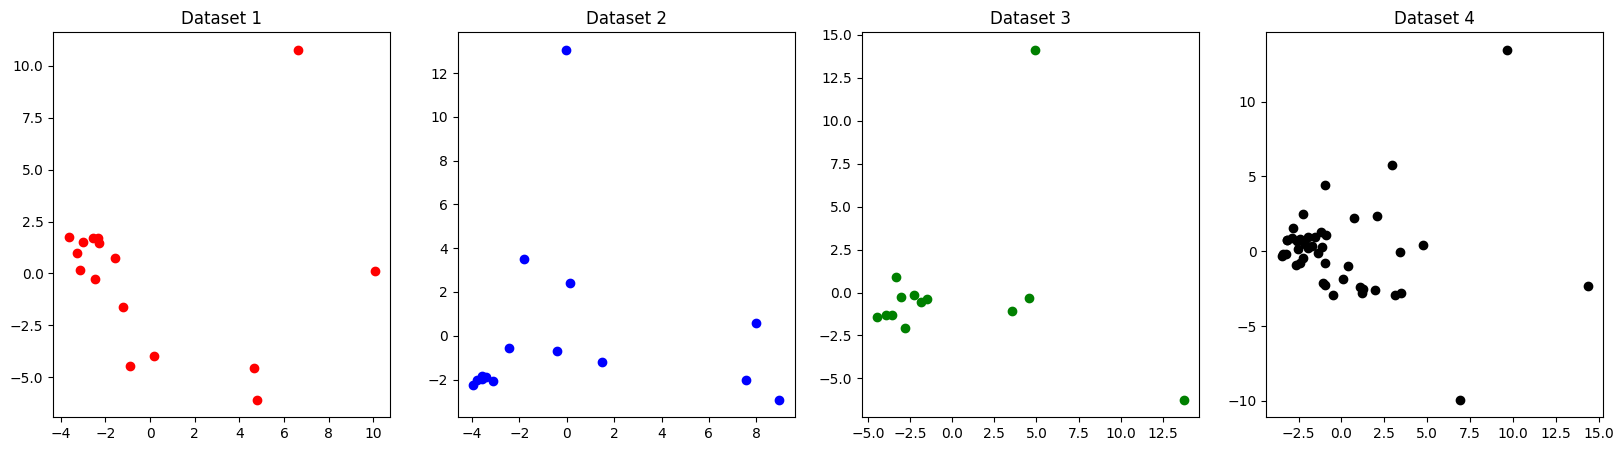

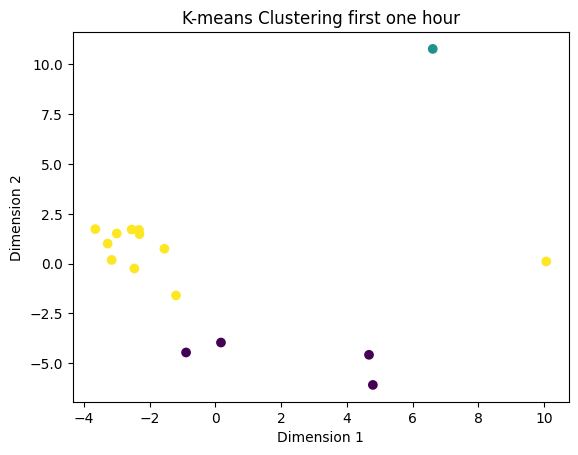

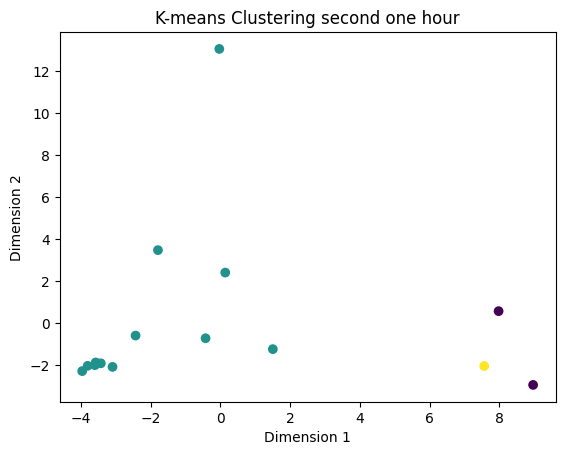

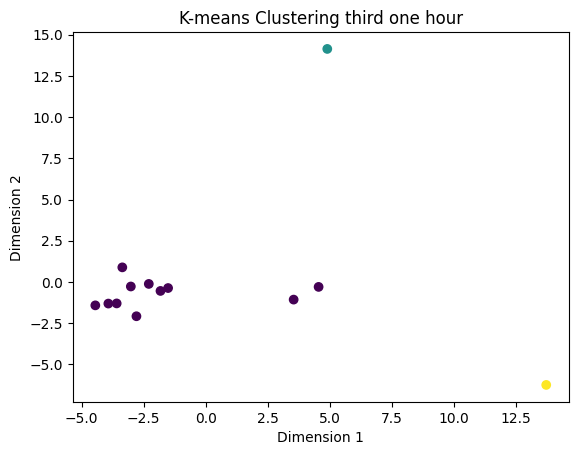

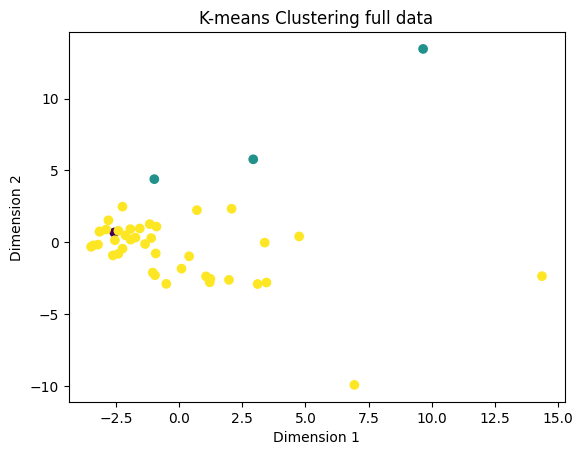

In [35]:
from sklearn.decomposition import PCA

k=3

def ElbowKmeans(reduced_data):
    # Define the range of k values to try
    k_values = range(2, 10)

    # Initialize list to store the within-cluster sum of squares (WCSS) for each k
    wcss = []

    # Iterate over each k value
    for k in k_values:
        # Run k-means clustering
        kmeans = KMeans(n_clusters=k, n_init="auto")
        kmeans.fit(reduced_data)

        # Append the WCSS to the list
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values for each k and save as image
    plt.plot(k_values, wcss, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()

def Kmeans(reduced_data, k, additionalTxt = ""):
    # Run k-means clustering
    kmeans = KMeans(n_clusters=k, n_init="auto")  # Assuming 3 clusters
    kmeans.fit(reduced_data)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Plot the clusters
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('K-means Clustering ' + additionalTxt)
    plt.show()

def plotGraphs(pca, labels, number):
    colors = ['red', 'blue', 'green']  # You can change the colors if desired
    plt.figure(figsize=(8, 6))

    # Plot each cluster as a separate scatter plot
    for cluster_id in range(3):
        plt.scatter(pca[labels == cluster_id, 0], pca[labels == cluster_id, 1], color=colors[cluster_id], label=f'Cluster {cluster_id}')

    # Add plot details
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering Results {number}')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

def norm(df):
    # Replace all NaN values with 0
    df.fillna(0, inplace=True)

    # Extract the numeric features
    df = df.select_dtypes(include='number')

    # Find columns with only zeros
    zero_columns = df.columns[(df == 0).all()]

    # Remove columns with only zeros from the data
    data_filtered = df.drop(zero_columns, axis=1)

    # Normalize or standardize the numeric features
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_filtered)
    return normalized_data

data1 = pd.read_csv('output_feature_1st.csv')
data2 = pd.read_csv('output_feature_2nd.csv')
data3 = pd.read_csv("output_feature_3rd.csv")
data4 = pd.read_csv("full_features.csv")
# data4 = data4.drop(data4.columns[0], axis=1)


data1 = norm(data1)
data2 = norm(data2)
data3 = norm(data3)
data4 = norm(data4)

pca1 = PCA()
pca_data1 = pca1.fit_transform(data1)

pca2 = PCA()
pca_data2 = pca2.fit_transform(data2)

pca3 = PCA()
pca_data3 = pca3.fit_transform(data3)

pca4 = PCA()
pca_data4 = pca4.fit_transform(data4)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].scatter(pca_data1[:, 0], pca_data1[:, 1], c='red')
axs[0].set_title('Dataset 1')

axs[1].scatter(pca_data2[:, 0], pca_data2[:, 1], c='blue')
axs[1].set_title('Dataset 2')

axs[2].scatter(pca_data3[:, 0], pca_data3[:, 1], c='green')
axs[2].set_title('Dataset 3')

axs[3].scatter(pca_data4[:, 0], pca_data4[:, 1], c='black')
axs[3].set_title('Dataset 4')

plt.show()

Kmeans(pca_data1, 3, "first one hour")
Kmeans(pca_data2, 3, "second one hour")
Kmeans(pca_data3, 3, "third one hour")
Kmeans(pca_data4, 3, "full data")

## Define k-means finctions

## PCA:

    - PCA is a linear dimensionality reduction technique that aims to find a lower-dimensional representation of the data while preserving as much variance as possible.
    - It transforms the data into a new set of uncorrelated variables called principal components. These components are ordered by the amount of variance they explain in the data.
    - PCA is useful for identifying the most important features or reducing the dimensionality of the data when there is a large number of correlated features.
    - It is a linear technique that works well for capturing global patterns in the data but may not perform well when dealing with complex, nonlinear relationships.

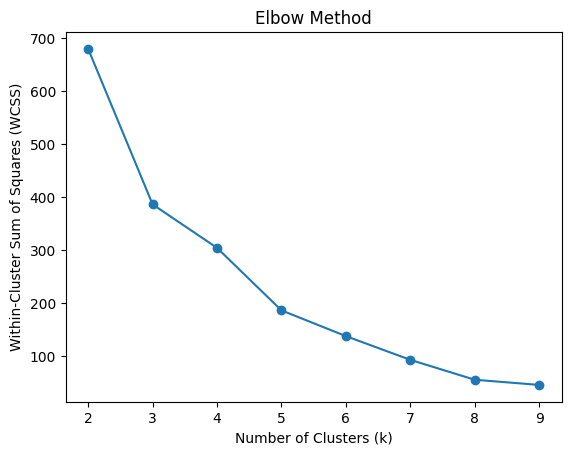

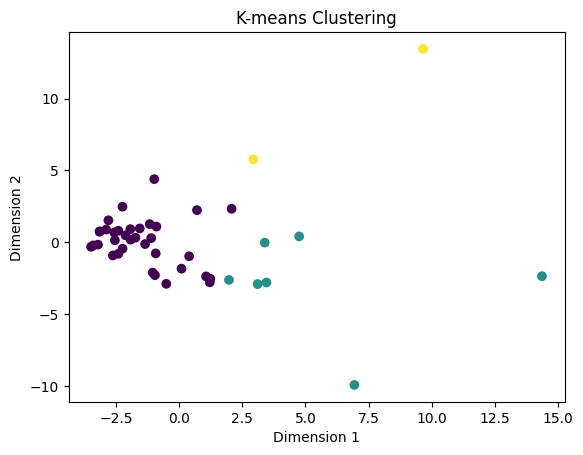

In [25]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(data4)
ElbowKmeans(reduced_data)
Kmeans(reduced_data, k)

In [26]:
feature_names = list(data_filtered.columns)

# Access the feature loadings (coefficients) for each component
feature_loadings = pca.components_

# Calculate the absolute sum of feature loadings for each component
abs_feature_loadings_sum = np.abs(feature_loadings).sum(axis=0)

# Sort the features based on their importance
sorted_indices = abs_feature_loadings_sum.argsort()[::-1]

print("Most Important Features:")
for i, feature_index in enumerate(sorted_indices):
    feature_name = feature_names[feature_index]
    print(f"Feature {feature_index + 1}: {feature_name}")

Most Important Features:
Feature 34: AlreadyVisitedTwizzers 1,2
Feature 41: frames_brush_per_video
Feature 33: AlreadyVisitedTwizzers 1,1
Feature 77: AlreadyVisitedTwizzersLast 1,1
Feature 58: AlreadyVisitedBrushLast1,2
Feature 15: AlreadyVisitedBrush 2,0
Feature 68: countMatTwizzersLast 1,1
Feature 62: %OfSandBrushesLast
Feature 14: AlreadyVisitedBrush 1,2
Feature 85: frames_brush_per_video_last
Feature 24: countMatTwizzers 1,1
Feature 25: countMatTwizzers 1,2
Feature 8: countMatBrush 2,2
Feature 86: frames_tw_per_video_last
Feature 53: AlreadyVisitedBrushLast0,0
Feature 21: countMatTwizzers 0,1
Feature 17: AlreadyVisitedBrush 2,2
Feature 9: AlreadyVisitedBrush 0,0
Feature 72: countMatTwizzersLast 2,2
Feature 52: countMatBrushLast 2,2
Feature 18: %OfSandBrushes
Feature 12: AlreadyVisitedBrush 1,0
Feature 38: %OfSandTwizzers
Feature 50: countMatBrushLast 2,0
Feature 49: countMatBrushLast 1,2
Feature 81: AlreadyVisitedTwizzersLast 2,2
Feature 3: countMatBrush 1,0


IndexError: list index out of range

In [27]:
explained_variance_ratio

NameError: name 'explained_variance_ratio' is not defined

## t-SNE:

    - t-SNE is a nonlinear dimensionality reduction technique that focuses on preserving the local structure of the data points.
    - It constructs a probability distribution over pairs of high-dimensional data points and a similar distribution over pairs of low-dimensional points. It then minimizes the divergence between these two distributions.
    - t-SNE is particularly effective at visualizing high-dimensional data in a lower-dimensional space, emphasizing the local relationships and clustering patterns.

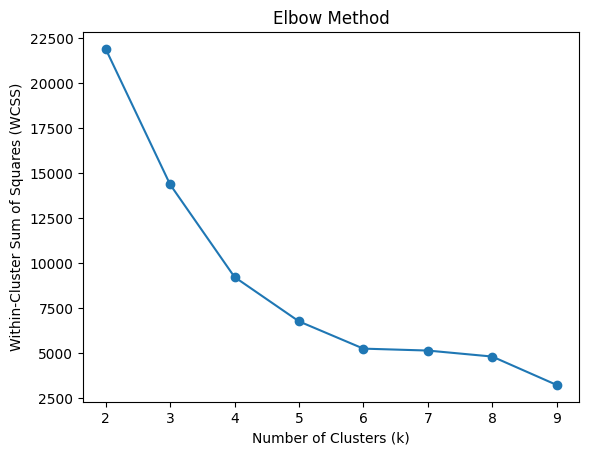

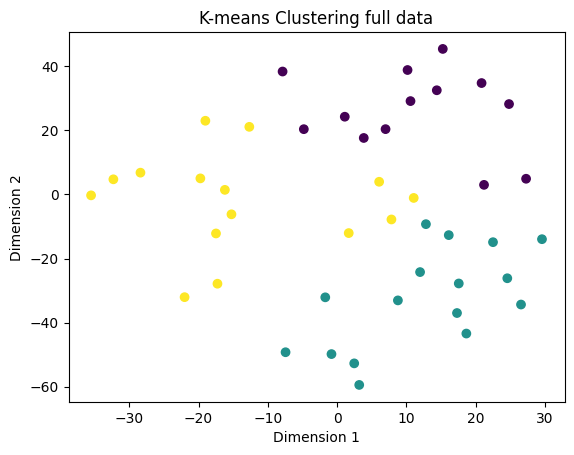

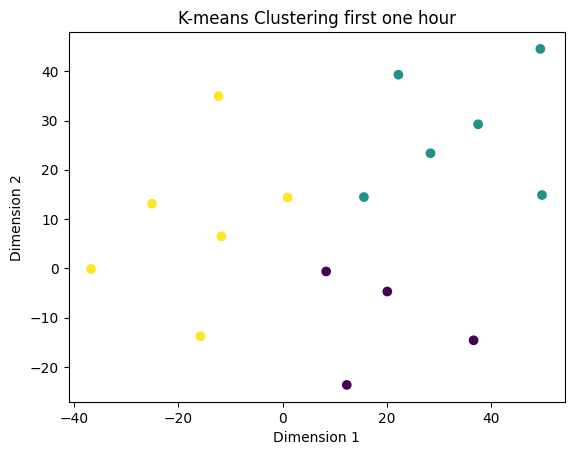

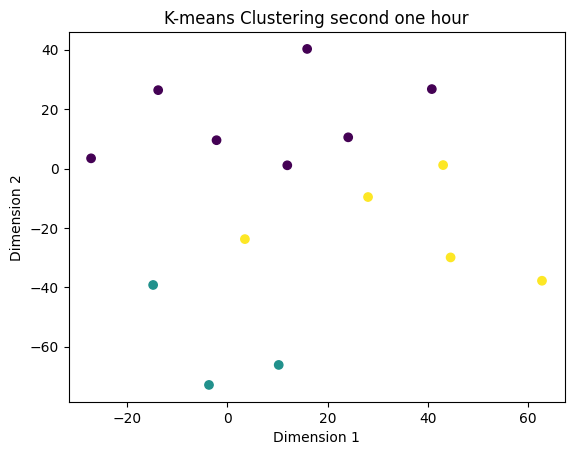

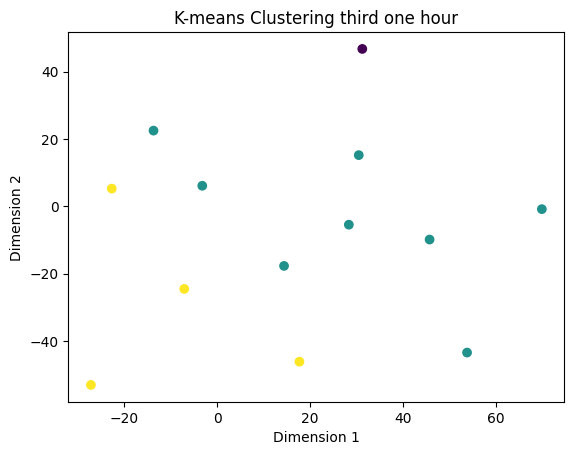

In [38]:
# Reduce perplexity value
perplexity = 5

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity)
data_tsne = tsne.fit_transform(data4)
data_tsne_first_hhour = tsne.fit_transform(data1)
data_tsne_second_hhour = tsne.fit_transform(data2)
data_tsne_third_hhour = tsne.fit_transform(data3)

ElbowKmeans(data_tsne)

Kmeans(data_tsne, k, "full data")
Kmeans(data_tsne_first_hhour, k, "first one hour")
Kmeans(data_tsne_second_hhour, k, "second one hour")
Kmeans(data_tsne_third_hhour, k, "third one hour")

## UMAP (Uniform Manifold Approximation and Projection):

    - UMAP is a nonlinear dimensionality reduction technique that preserves both global and local structure of the data.
    - It constructs a weighted graph that captures the manifold structure of the data and optimizes the embedding in a low-dimensional space.
    - UMAP is designed to be computationally efficient and can handle large datasets.
    - **It** is effective at preserving complex topological structures and capturing both global and local relationships in the data.

D:\Python\ArchaeologyPickingAnalsys-main\venv\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
D:\Python\ArchaeologyPickingAnalsys-main\venv\lib\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


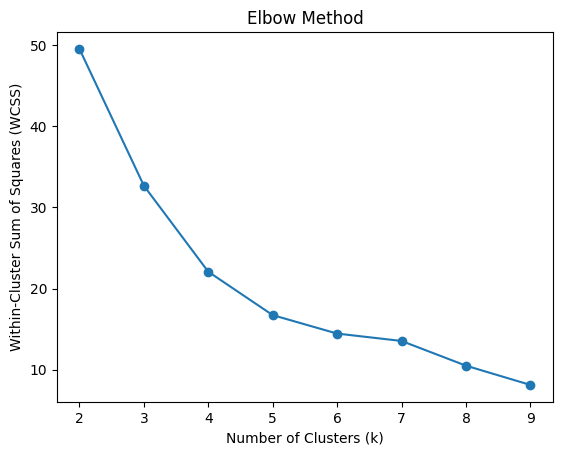

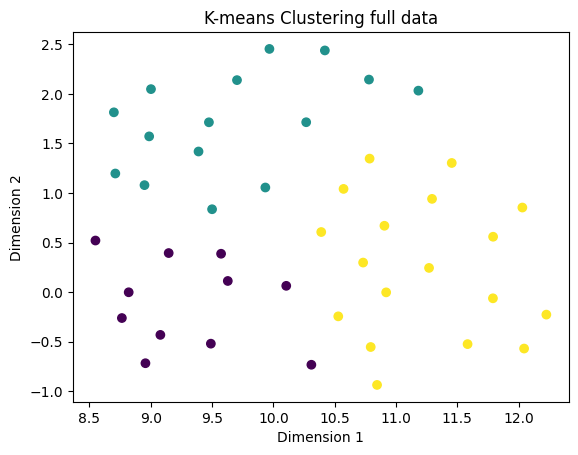

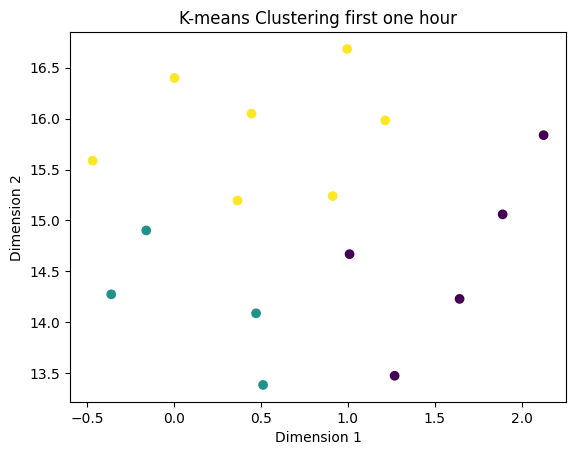

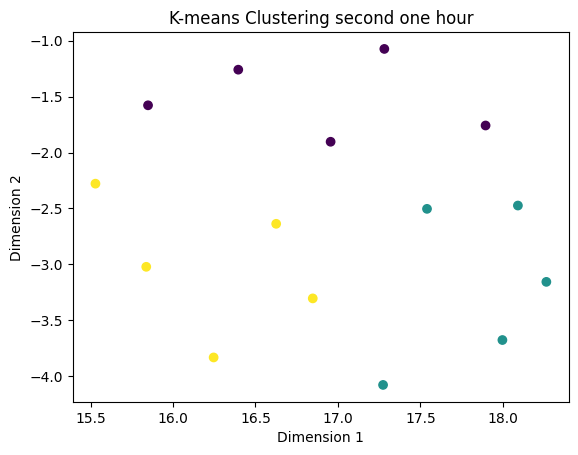

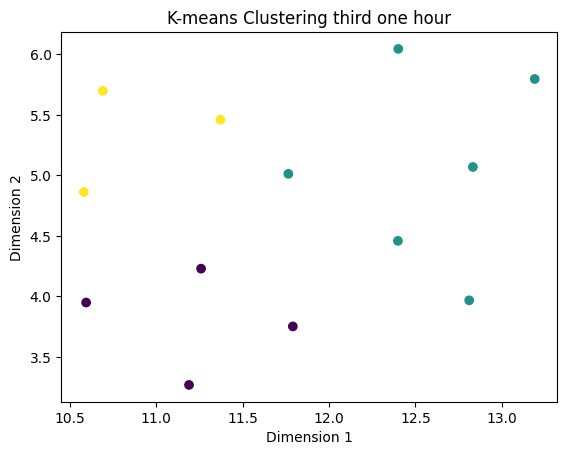

In [39]:
# Perform UMAP
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2)
data_umap_full = umap_model.fit_transform(data4)
data_umap_1 = umap_model.fit_transform(data1)
data_umap_2 = umap_model.fit_transform(data2)
data_umap_3 = umap_model.fit_transform(data3)


ElbowKmeans(data_umap_full)
Kmeans(data_umap_full, k, "full data")
Kmeans(data_umap_1, k, "first one hour")
Kmeans(data_umap_2, k, "second one hour")
Kmeans(data_umap_3, k, "third one hour")

## random forest

In [40]:
from tqdm import tqdm
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Step 1: Load the CSV data into a pandas DataFrame
data = pd.read_csv('full_features.csv')
data = data.drop(data.columns[0], axis=1)

# Step 2: Drop the last column
data.drop(data.columns[-1], axis=1, inplace=True)

data.fillna(0, inplace=True)

# Step 3: Convert the second last column to numerical values
label_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
data.iloc[:, -1] = data.iloc[:, -1].map(label_mapping)

# Step 4: Split the data into features (X) and labels (y)

y = data.iloc[:, -2]   # Last column (labels)
X = data
X.drop(X.columns[-2], axis=1, inplace=True)

# Step 5: Convert the labels into numerical values
label_mapping = {'yuval': 0, 'matan': 1, 'nir': 2}
y = y.map(label_mapping)

# Step 8: Repeat steps 6-7 iteratively, storing the accuracy at each iteration
accuracy_scores = []
num_of_features_list = []
n_features_to_stop = int(0.2 * X.shape[1])  # Total number of features

pbar = tqdm(total=X.shape[1]-n_features_to_stop, desc='Feature Selection Progress')

while X.shape[1] > n_features_to_stop:
    num_of_features_list.append(X.shape[1])

    # Step 4: Create a random forest classifier
    clf = RandomForestClassifier()

    # Step 5: Perform cross-validation to evaluate the classifier's accuracy
    scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
    accuracy_scores.append(scores.mean())

    # Step 6: Retrieve the feature importances from the random forest
    clf.fit(X, y)
    importances = clf.feature_importances_

    # Step 7: Remove the least important features
    threshold = sorted(importances)[int(0.1 * len(importances))]
    least_important = X.columns[importances < threshold]
    X.drop(least_important, axis=1, inplace=True)
    pbar.update(len(least_important))

pbar.close()




Feature Selection Progress: 100%|██████████| 71/71 [00:06<00:00, 10.58it/s]


In [ ]:
accuracy_scores

[0.7916666666666666,
 0.836111111111111,
 0.7916666666666666,
 0.7916666666666666,
 0.836111111111111,
 0.8138888888888889,
 0.8138888888888889,
 0.8388888888888889,
 0.836111111111111,
 0.8138888888888889,
 0.8138888888888889,
 0.7916666666666666,
 0.7694444444444444,
 0.8388888888888889,
 0.7722222222222223,
 0.8166666666666667,
 0.8416666666666666,
 0.7916666666666666]

In [ ]:
num_of_features_list

[89, 81, 73, 66, 60, 54, 49, 45, 41, 37, 34, 31, 28, 26, 24, 22, 20, 18]

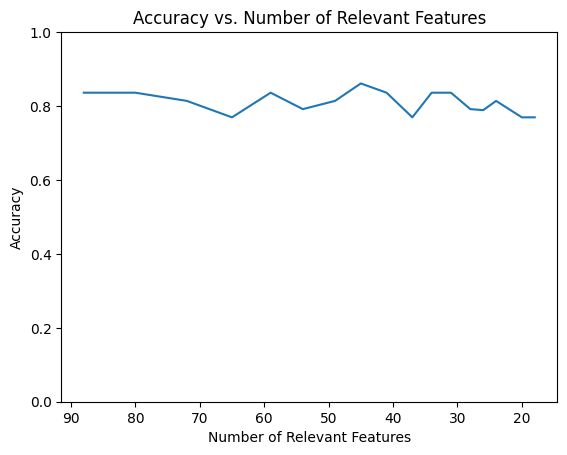

In [31]:
# Step 9: Plot the graph of accuracy based on the number of relevant features
plt.plot(num_of_features_list, accuracy_scores)
plt.xlabel('Number of Relevant Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Relevant Features')
plt.gca().invert_xaxis()
plt.ylim(0, 1)
plt.show()